# Python modules & introduction to `numpy`, `scipy`, `matplotlib`

## Table of Content

- [I. What is a module ?](#I.--What-is-a-module-?)
- [II. Numpy](#II)
    * [II.1 Array Definition and construction](#II.1)
    * [II.2 Array copies and views](#II.2)
    * [II.3 Shape manipulation](#II.3)
    * [II.4 What makes numpy Arrays useful structures ?](#II.4)
        - [II.4.1 ufunc](#II.4.1)
        - [II.4.2 Aggregation](#II.4.2)
        - [II.4.3 Broadcasting](II.4.3)
        - [II.4.4 Slicing, masking, fancy indexing](#II.4.4)
    * [II.5 Reading arrays from a file and string formatting](#II.5)
    * [II.6 Summary](#II.6)
- [III. Matplotlib](#III)
    * [III.1 Simple plot](#III.1)
    * [III.2 A bit more advanced plotting](#III.2)
        - [III.2.1 Plot properties](#III.2.1)
        - [III.2.2 Create multiple subplots](#III.2.2)
        - [III.2.3 Twin axes](#III.2.3)
        - [III.2.4 Export your figure](#III.2.4)
- [IV. Scipy](#IV)
- [V. The standard library](#V)
- [VI. References and supplementary material](#VI)

## I.  What is a module ?

We have seen the main structures/objects (e.g. `list`, `dictionary`) during the last lecture as well as methods attached to those (e.g. `list.append(val)`). We have also seen how to build functions (kind of scripts that allow you to automatize some sequences of operations). The  Notebook `Recap_python_L1.ipynb` summarizes the main things we have learned. 

If you quit from the `Ipython` interpreter and enter it again, the definitions you have made (functions and variables) are lost. Therefore, if you want to write a somewhat longer program, you better use a text editor to prepare the input for the interpreter and running it with that file as input instead. This is known as creating a script. As your program gets longer, you may want to split it into several files for easier maintenance. You may also want to use a handy function that you’ve written in several programs without copying its definition into each program.

To support this, Python has a way to put definitions in a file and use them in a script or in an interactive instance of the interpreter. Such a file is called a module; definitions from a module can be imported into other modules or into the main module (the collection of variables that you have access to in a script executed at the top level and in calculator mode).

A module is a file containing Python definitions and statements. The file name is the module name with the suffix `.py` appended. When you want to make use of a module in a program or in an interactive window, you should simply do: 
``` python
import module
```
Then, you call functions in you script simply by doing `module.funtion()`. 

** Example **: 
In file `myawesomemodule.py`, we have written
``` python
def talk():
    print 'What do you want master ?'
    return
```

Then, in Ipython/Jupyter, you can simply do: 
``` python 
import myawesomemodule
myawesomemodule.talk()   # call the function talk() you have defined in myawesomemodule.py
    Out: 'What do you want master ?'

# you can also do this the following way
import myawesomemodule as ms
ms.talk()

# or, if you want to only call the function talk:
from myawesomemodule import talk
talk()

```

Sometimes, you'll also hear about *packages*. *Packages* are simply ensemble of modules, and you load/import them the same way you do for modules. 

**Exercise:**

Create a module `area` that calculates areas of simple geometric figures.   
You can start with a square, and a circle.

In [23]:
# Import the module `area` you have created and calculate the area of a square of side s=2; circle of radius r=2)
#import myawesomemodule as ms 
reload(myawesomemodule)
import area
# talk()
#print area.square(2)
#print area.circle(2)

What do you want master ?


In python, there is `.pyc` files often generated with the same name as the module/~~script~~ you are importing/~~running~~. Imagine you have a module `sayhello.py`. When you import your module the first time, a file `sayhello.pyc` will be created, that contains an already-"byte-compiled" version of `sayhello.py` to speed up the execution. The modification time of the version of `sayhello.py` used to create `sayhello.pyc` is recorded in `sayhello.pyc`, and the `.pyc` file is ignored if these don't match. A program does not run faster when read from a `pyc` instead of a `py`, but **it is loaded** more quickly.  

If you have loaded your module in an `Ipython` and then modify it with an editor, it won't account directly for your modifications (because the `pyc` has not been re-compiled). You need to [reload()](https://docs.python.org/2/library/functions.html#reload) your module to implement your changes in the current session. 

** Notes: **
When a module named `spam` is imported, the interpreter first searches for a built-in module with that name. If not found, it then searches for a file named `spam.py` in a list of directories given by the variable `sys.path` (see below). `sys.path` is initialized from these locations:
- the directory containing the input script (or the current directory).
- `PYTHONPATH` (a list of directory names, with the same syntax as the shell variable PATH).
- the installation-dependent default.

After initialization, Python programs can modify `sys.path`. The directory containing the script being run is placed at the beginning of the search path, ahead of the standard library path. This means that scripts in that directory will be loaded instead of modules of the same name in the library directory. This is an error unless the replacement is intended.

TIP: You can create your own modules ovbiously, but one of the great asset of python is the availability of a **huge** library of third-party modules, often designed by scientists for scientists (including astronomers !). Some of these modules introduce new structures/objects that you may have to masterize/understand by yourself. There is some modules that **YOU NEED TO KNOW** to efficiently work on data-science related projects: `numpy`, `scipy` and `matplotlib` ... We will extensively use those modules when studying numerical methods for data analysis. 


## II. `numpy`:  <a class="anchor" id="II"></a>

`numpy` can be seen as the implementation of mathematical functions and operations for python language. It also introduces one key object `arrays`. 

### II.1 `array` definition and construction:  <a class="anchor" id="II.1"></a>

- A `numpy` array is an object of the type `np.ndarray` (although this type specifier is rarely used directly). Instead one can create arrays in several ways: 

``` python
import numpy as np
np.array([1,2,3,4])   # creates an array from a python list
np.array([[0, 1, 2], [3, 4, 5]])   # Creates a 2D array from a python list
np.arange(5) # similar to the built-in range() function.
np.linspace(1, 10, 10) # creates an array of 10 elements from 1 to 10
np.zeros(10)  # creates an array fo 10 elements filled with 0
np.ones(10)   # creates an array of 5 elements filled with 1
np.zeros((2, 5))  # mulitdimensional arrays of 2 rows and 5 columns
```
- 2-D arrays of `shape=(r, c)` are arrays with `r` *rows* and `c` *columns*. This means that indices for what we commonly call `y-axis` come first, and for `x-axis` come second. 


In [2]:
# Let's try the above commands and visualise the output. 
import numpy as np
#a = np.arange(0,5,0.7)
a = np.zeros((3, 4))
print a
a[2, 3] = 1
print a 

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


- numpy has also tools to create arrays filled with random elements:

``` python
np.random.random(size=4)  # uniform between 0 and 1
np.random.normal(size=4)  # elements are std-normal distributed

```

In [33]:
# Try the above commands 
#np.random.random(size=4)
np.random.normal(size=4)

array([-1.47828511, -1.04478342,  0.57038364, -0.37458177])

- You can explicitly specify which **data-type** you want:

``` python 
c = np.array([1, 2, 3], dtype=float)
c.dtype
    Out: dtype('float64')
```

In [38]:
c = np.array([1, 2, 3], dtype=float)
d = np.array(c, dtype=int)
print d
print c

[1 2 3]
[ 1.  2.  3.]


The default data type is floating point. Other possible data types are: 

* **COMPLEX** numbers: 
``` python
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype
    Out: dtype('complex128')
```

* **BOOL**:
``` python
e = np.array([True, False, False, True])
e.dtype
    Out: dtype('bool')
```

In [41]:
e = np.array([True, False, False, True])
print e.dtype
print type(e)

bool
<type 'numpy.ndarray'>


* **String**:
``` python
f = np.array(['abc', 'eddafg', 'hjk'])
f.dtype
    Out: dtype('S6')   # <--- String of 6 characters (by default largest elements of the array 
```

* **Other data types**:  `int32`, `int64`, `uint32`, `uint64`

Note that `type(f)` tells you that `f` that `f` is a numpy array, while `f.dtype` gives you the type of the elements containted in `f`. `dtype` is an attribute of the object `np.array`. If you try to access the attribute dtype of a List, you will get an error message. 

In [42]:
# Difference between type/dtype; application to List/arrays.
f = np.array(['abc', 'eddafg', 'hjk'])
print type(f)
print f.dtype
L = ['abc', 'eddafg', 'hjk']
print type(L)
print L.dtype

<type 'numpy.ndarray'>
|S6
<type 'list'>


AttributeError: 'list' object has no attribute 'dtype'

- Last but not least, `numpy` is also the package that allows you to calculate many common mathematical function (see also [`ufunc`](#II.4.1)): `np.log10()` (base 10 log), `np.log()` (natural log), `np.exp()`, `np.sin()`, `np.cos()`, etc. See the list of `numpy` mathematical functions [here](https://docs.scipy.org/doc/numpy/reference/routines.math.html)

In [45]:
# create an array of floats and calculate its log
a = np.linspace(-np.pi, np.pi, 20.)
print a 
np.sin(a)


[-3.14159265 -2.81089869 -2.48020473 -2.14951076 -1.8188168  -1.48812284
 -1.15742887 -0.82673491 -0.49604095 -0.16534698  0.16534698  0.49604095
  0.82673491  1.15742887  1.48812284  1.8188168   2.14951076  2.48020473
  2.81089869  3.14159265]


array([ -1.22464680e-16,  -3.24699469e-01,  -6.14212713e-01,
        -8.37166478e-01,  -9.69400266e-01,  -9.96584493e-01,
        -9.15773327e-01,  -7.35723911e-01,  -4.75947393e-01,
        -1.64594590e-01,   1.64594590e-01,   4.75947393e-01,
         7.35723911e-01,   9.15773327e-01,   9.96584493e-01,
         9.69400266e-01,   8.37166478e-01,   6.14212713e-01,
         3.24699469e-01,   1.22464680e-16])

**Exercise:**   
For the array:
``` python
a = np.array([[1,2,3,4], [4,5,6,7], [2,3,4,5] ])
```
what is the output of `a.ndim`, `a.shape`, `len(a)` ?     
How does the above commands relate to the rows, columns, dimensions ?       
How do you access 2nd item of the first row ?   

*Note:* 
Try to do the same with the following array:
``` python
b = np.array([[1,2,3], []])
```

In [46]:
a = np.array([[1,2,3,4], [4,5,6,7], [2,3,4,5] ])
print a.ndim
print len(a)
print a.shape
print a
print '2nd item 1st row = ', a[0,1]
# len(a) gives the number of rows, 
# shape returns a tuple containing the number of elements along each dimension. 
# ndim gives the dimensions / number of axis of the array
a = np.array([[1.,2.,3.], []])
print a.ndim
print len(a)
print a.shape
print a

2
3
(3, 4)
[[1 2 3 4]
 [4 5 6 7]
 [2 3 4 5]]
2nd item 1st row =  2
1
2
(2,)
[[1.0, 2.0, 3.0] []]


In [58]:
a = np.array([[1,2,3,4,5,6], [4,5,6,7,8,9], [2,3,4,5,6,7] ])
print a
print '************************'
start, end, step = 2, 5, 2
#print a[0, start:end:step]
a1 = np.arange(0,10)
a[0, 0:5][0:2]


[[1 2 3 4 5 6]
 [4 5 6 7 8 9]
 [2 3 4 5 6 7]]
************************


array([1, 2])

**Exercise:** Elementwise operations

In the code cell below, try simple arithmetic elementwise operations: 
- add even elements with odd elements using 2 different techniques
- Time the two solution using %timeit.
- Generate an array from a list made of strings and floats. What is the final array type ?
- Generate 2 arrays such that their elements are as follow :    
   `[2**0, 2**1, 2**2, 2**3, 2**4]`    
   `a_i = 2^(3*i) - i `    


### II.2 `array` copies and views:   <a class="anchor" id="II.2"></a>

A slicing operation creates a **view** on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory. You can use `np.may_share_memory()` to check if two arrays share the same memory block.
To provide this behaviour, and create a brand new array from the slice of the original one *without modifying the latter*, you may use the method `copy()`: `c = a[0:2].copy()` will create a **new array** that is a **copy** of the first two elements of a. 

**When modifying the view, the original array is modified as well**. Try the cells below to understand how memory allocation work. 

In [59]:
import numpy as np
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [61]:
np.may_share_memory(a, b)

True

In [62]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [63]:
a   # (!)

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [64]:
a = np.arange(10)
c = a[::2].copy()  # force a copfiy
c[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
np.may_share_memory(a, c)

False

### II.3 Array shape manipulation <a class="anchor" id="II.3"></a>

- **II.3.1 Flattening**:    
The method `ravel()` flattens the array into a single-row array (each row of the array is merged with the previous one). 

In [66]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [67]:
a.T   # Transpose the array

array([[1, 4],
       [2, 5],
       [3, 6]])

In [68]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

**Note**: `a.T` is a property of array `a` that returns the array transposed, while np.transpose(a) is a function that returns a view of the array(a) transposed. As a.T is a property of the object a, it is relatively quicker than the call of a function as you can test using the `%timeit` magic command. For N dim arrays, transpose() allows a bit more than just transposing (see below II.3.4.)

In [69]:
%timeit(a.transpose())
%timeit(a.T)

The slowest run took 115.94 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 181 ns per loop
The slowest run took 37.00 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 135 ns per loop


- **II.3.2 Reshaping**:   
The method `reshape(newshape)` allows one to reorganise the elements of an array, to create a "new" array (see below) that has a different shape. The total number of items of the array has to be the same ! 

In [70]:
a.shape

(2, 3)

In [71]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# Alternatively 
a.reshape((2, -1))    # unspecified (-1) value is inferred

**WARNING:** Reshaping may return a **view** or a **copy** !

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b=a.ravel()
b=b.reshape((2,3))
# Let's modify b and show a to see if we have a view or a copy ... 
b[0, 0] = 99
a


In [ ]:
# let's now create an array with np.zeros and reshape it 
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
a


To understand this you need to learn more about the memory layout of a numpy array. This is beyond the scope of this class. 

- **II.3.3 Adding a dimension**:

Indexing with the `np.newaxis` object allows us to add an axis to an array

In [72]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [73]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [74]:
z[:, np.newaxis].shape

(3, 1)

In [ ]:
z[np.newaxis, :]

In [ ]:
z[np.newaxis, :].shape

- **II.3.4. Dimension shuffling**:

In [ ]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

In [ ]:
a[0, 2, 1]

In [ ]:
b = a.transpose(1, 2, 0)
b.shape

In [ ]:
b[2, 1, 0]

In [ ]:
# Check that shuffling dimensions creates a view of the array

- **II.3.5. Resizing**: 

Size of an array can be changed with `ndarray.resize`:

In [75]:
a = np.arange(4)
a.resize((8,))   # you give as argument the new shape of the array
a


array([0, 1, 2, 3, 0, 0, 0, 0])

However, it must not be referred to somewhere else:

In [76]:
b = a
a.resize((4,))   

ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function

**Exercises:**

~~- Look at the docstring for reshape, especially the notes section which has some more information about copies and views.~~
- Use flatten as an alternative to ravel. What is the difference? (Hint: check which one returns a view and which a copy)
- Experiment with transpose for dimension shuffling.


- **II.3.6. Meshgrid**: 

A very useful method that returns coordinate matrices from coordinate vectors. This is extremely useful when you want to evaluate a function on a grid (i.e. $z = f(x, y)$) ... which is something very common in observational astronomy ! This is also useful when you want to do contour plots (to e.g. interpolate over a regular grid). 

The way to proceed is to define your `x` and `y` vectors (corresponding to the (x,y) coordinates on a grid is the following:
``` python
x_vec, y_vec = np.linspace(0, 5, 6), np.linspace(0, 5, 3)
X, Y = meshgrid(x_vec,y_vec)

# Now you can evaluate the function z = (x**2 + y**2)
Z = X**2 + Y**2
```

`X` and `Y` created  with meshgrid() are now arrays of (6, 3) (3 rows and 6 columns) containing respectively coordinate x (for X) and y (for Y) of each grid element. This can be generalised to larger dimensions !

So, the array `Z` of shape (6,3) corresponds to points with the following coordinates:

['(0.0,0.0)', '(1.0,0.0)', '(2.0,0.0)', '(3.0,0.0)', '(4.0,0.0)', '(5.0,0.0)']   
['(0.0,2.5)', '(1.0,2.5)', '(2.0,2.5)', '(3.0,2.5)', '(4.0,2.5)', '(5.0,2.5)']   
['(0.0,5.0)', '(1.0,5.0)', '(2.0,5.0)', '(3.0,5.0)', '(4.0,5.0)', '(5.0,5.0)']   

** Note: **
This function supports both indexing conventions through the indexing keyword argument.  Giving the string 'ij' returns a meshgrid with matrix indexing, while 'xy' returns a meshgrid with Cartesian indexing. In the 2-D case with inputs of length M and N, the outputs are of shape (N, M) for 'xy' indexing and (M, N) for 'ij' indexing.  In the 3-D case with inputs of length M, N and P, outputs are of shape (N, M, P) for 'xy' indexing and (M, N, P) for 'ij' indexing. In other words, indexing 'ij' yields a transposed version of the array obtained with indices i,j. See `help(meshgrid)` for more details. 

In [13]:
# Experiment with "meshgrid()" following the code above. 
import numpy as np
x_vec, y_vec = np.linspace(0, 5, 6), np.linspace(0, 5, 3)
X, Y = np.meshgrid(x_vec,y_vec)
def gauss2D(X, Y):
    return np.exp( -0.5*(X**2 + Y**2) )

gauss2D(X, Y)
# Try to write a command that prints at the screen the coordinates of the grid elements (as above) (TIP: you do not need meshgrid)

array([[  1.00000000e+00,   6.06530660e-01,   1.35335283e-01,
          1.11089965e-02,   3.35462628e-04,   3.72665317e-06],
       [  4.39369336e-02,   2.66490973e-02,   5.94621736e-03,
          4.88095244e-04,   1.47391992e-05,   1.63737713e-07],
       [  3.72665317e-06,   2.26032941e-06,   5.04347663e-07,
          4.13993772e-08,   1.25015287e-09,   1.38879439e-11]])

** Exercise **: 

We will use meshgrid [later](#meshgrid), after we have learned how to visualise results with `python`. 

### II.4 What makes `numpy` arrays useful structures ?  <a class="anchor" id="II.4"></a>

Python is fast *for coding and developping* but python is slow when it comes to *execution*, especially when it comes to execution of for loops.    
The reason behind this low speed is e.g. that when it does `for a in range(10): a + b`, it has to check the `type` of `a`, of `b` and of *each value* in those lists before executing. 

`numpy` helps speeding up code through 4 strategies:
1. `ufunc`
2. aggregation
3. broadcasting
4. slicing, masking, fancy indexing

#### II.4.1 `ufunc`: operates elementwise on objects. <a class="anchor" id="II.4.1"></a>

Those `ufunc` are included (compiled) in `numpy`. They include: 

- all mathematic operation: +, -, /, *, `**`, 
- Mathematical expressions: sin, exp, cos, log10, ... 
- Comparison operators <, >, =, ...
- etc ... 

** Example:**
``` python
import numpy as np
# Basic python
a = [1,2,3,4,5]
b = [ a + val for val in a]   # add 5 to each element of the list
# In numpy
a = np.array(a)
b = a + 5                     # add 5 to each element of the array.
```

In [17]:
# implement the above example for a list of 1000 elements 
# use %timeit before calculating b to see improvement in speed
a = range(1000)
%timeit b= [val+5 for val in a ]

a = np.array(a)
%timeit b =a+5

10000 loops, best of 3: 37.7 µs per loop
The slowest run took 2225.53 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.25 µs per loop


#### II.4.2 *aggregation*:   <a class="anchor" id="II.4.2"></a>

Functions which summarize values of an array such as `min`, `max`, `sum`, `mean`, ... 

** Example: **

``` python
# python version of an agregation
from random import random
c = [ random() for i in range(10000) ]
%timeit min(c)
#same in numpy:
c = np.array(c)
%timeit c.min()  
```
This also works on multidimensional arrays: 

``` python 
M = np.random.randint(0, 10, (10,4))
M.sum(axis=0)
M.sum(axis=1)
```

Aggregation available: 
`np.min()`, `np.max`, `np.prod()`, `np.mean()`, `np.std()`, `np.median()`, `np.any()`, `np.all()`, `np.nanmin()` (and nan versions of above aggregation), `np.argmin()`, `np.argmax()`, `np.percentile()`, ...


In [18]:
import numpy as np
from random import random
c = [ random() for i in range(1000) ]
%timeit min(c)
#same in numpy:
c = np.array(c)
%timeit c.min() 

The slowest run took 6.36 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 20.2 µs per loop
The slowest run took 69.73 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.16 µs per loop


#### II.4.3 *Broadcasting*:   <a class="anchor" id="II.4.3"></a>

Set of rules by which `ufuncs` operates on arrays of different sizes and/or dimensions. 

The term [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.
Application to three cases: 

![From astroML book](Figures/fig_broadcast_visual_1.png)



The rules / how this works:

* If array shapes differ, left-pad the smaller shape with 1s 
* If any dimension does not match, broadcast the dimension with size 1
* If neither non matching dimensions is 1 raise an error

This broadcasting strategy allows one to avoid doing `for` loops for some operations. 


#### II.4.4 Slicing, masking and fancy indexing:    <a class="anchor" id="II.4.4"></a>
	 
- **Mask**: a mask is a boolean array that can be used to "mask" some indices of an array: 

``` python
mask = np.array([False, False, True, False, True, False])
c = np.array([1, 3, 6, 9, 10, 2])
c[mask]
    Out: array([6, 10])
    
mask = (c < 4) | (c > 8)
c[mask]
    Out: array([1, 3, 9, 10, 2])
```
 

In [20]:
mask = np.array([False, False, True, False, True, False])
c = np.array([1, 3, 6, 9, 10, 2])
c[mask]

array([ 6, 10])

- **Fancy indexing**: passing a list/array of indices to get elements of a numpy array  (this only works for arrays !) This avoids to loop over the indices. 

``` python
ind = [1, 3, 4]
c[ind]  
   Out: array([3, 9, 10])
```

In [22]:
ind = [1, 3, 4]
print c
print c[ind]

[ 1  3  6  9 10  2]
[ 3  9 10]


- **Multi-dimensional** array: 

We can apply mask and fancy indexing in multidimension.   
Remember that first index is row, and second is column.   
Remember how slicing works: `a[start:end:step]`   : 
- Omitting one value goes up to the end of the sequence. 
- Omitting the second "colon" implies step=1.  
- With negative steps you count backward
- Start/step can be either positive or negative indices (but then you count from the end). 

In [29]:
a = np.arange(10)
print a
a[a>3]

[0 1 2 3 4 5 6 7 8 9]


array([4, 5, 6, 7, 8, 9])

``` python
M = np.arange(12).reshape((3,4))
    Out: 
    array([[ 0,  1,  2,  3],
           [ 4,  5,  6,  7],
           [ 8,  9, 10, 11]])

M[0,1] # gives value at row 0 and column 1. 
M[:, 1]  # Combines slices and indices -> all rows of column one
M[M-3 < 2]# can also do masking of n dimensional array
M[[1,0], :2] # Use fancy indexing and slicing - 1st 2 elements, of rows 1 and 2
M[M.sum(axis=1) > 2, 4:] # mixing masking and slicing 
```

An illustration of indexing in numpy arrays:
![Illustration of `np` indexing](Figures/numpy_indexing.png)

**Exercise**:
- Try the different flavours of slicing, using start, end and step: starting from a linspace, try to obtain odd numbers counting backwards, and even numbers counting forwards.

- Reproduce the slices in the diagram above. You may use the following expression to create the array:    
`np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]`

In [30]:
# Implement the exercise above
np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

#### II.5 Reading arrays from a file and string formatting:    <a class="anchor" id="II.5"></a>

Reading tables saved in a formated text file can be done with `numpy.loadtxt('myfile.txt')`, while saving your array is done with `numpy.savetxt('myfile.txt')`.   
Clever loading of text/csv files: `numpy.genfromtxt()`/`numpy.recfromcsv()`. Those commands can fill missing values in a table, read column names, exclude some columns, and guess data-type using `dtype = None`.   
Fast and efficient, but numpy-specific, binary format: `numpy.save()`/`numpy.load()`.

There is another flexible way to read/write in file, which is through the use of the `file()` object. For this, three operations are generally needed: 
``` python
f = open('myfile.txt', 'r')  # 'r' for read mode, 'w' for write mode, 'a' for append mode
f.read()  # this would read the whole file as a single string ; other methods allow one more flexible read
f.close() 
```
If you do `f.read()` twice, you will see an empty string ... as the file then "points" to the end of the file, and there is nothing left to read. Somehow, the methods that access the file object go sequentially through the "string content" of that object. With `read()` you take the string as a whole (which could be a problem memore-wise if the file is large !).    

There is several ways to do this. One is by using a `for` loop:
``` python
f = open('myfile.txt', 'r')
for line in f:
    print repr(line)
```

In [31]:
f = open('data.txt', 'r')
for line in f:
    print repr(line)   # repr(object) return the canonical string representation of the object

'# Name ID RA DEC z z_err zQF \r\n'
'0011 11.0 69.60398 -12.33483 0.14502699731 5.39539923983e-05 0.0 \r\n'
'0038 38.0 69.5969 -12.32047 0.502938602945 0.000222303791245 1.0 \r\n'
'0042 42.0 69.57136 -12.31795 0.0 0.001 0.0 \r\n'
'0055 55.0 69.59832 -12.31157 0.0 0.001 0.0 \r\n'
'0057 57.0 69.5978429 -12.311442 0.0 0.001 0.0 \r\n'
'0072 72.0 69.61111 -12.3037 0.0 0.001 0.0\r\n'
'0080 80.0 69.55023 -12.30339 0.0 0.001 0.0\r\n'
'0083 83.0 69.58752 -12.30232 0.0 0.001 0.0\r\n'
'0085 85.0 69.56567 -12.30147 0.0 0.001 0.0\r\n'
'0111 111.0 69.59927 -12.29414 0.0 0.001 0.0\r\n'
'0114 114.0 69.52129 -12.2893 0.0 0.001 0.0\r\n'
'0119 119.0 69.5651 -12.28924 0.0 0.001 0.0\r\n'
'0125 125.0 69.53808 -12.28883 0.0 0.001 0.0\r\n'
'0126 126.0 69.54177 -12.28782 0.0 0.001 0.0\r\n'
'0128 128.0 69.60646 -12.28668 0.369864207858 8.03355766875e-05 0.0\r\n'
'0164 164.0 69.52007 -12.24671 0.581369862213 0.000216496440347 2.0\r\n'
'0182 182.0 69.53533 -12.25025 0.0 0.001 0.0\r\n'
'0185 185.0 69.52459 -12.249

In [42]:
f = open('data.txt', 'r')
#for line in f.readlines():
#    print repr(line)
a = f.readlines()
a[10].replace('.', ',')

'0111 111,0 69,59927 -12,29414 0,0 0,001 0,0\r\n'

Each line is being returned as a string. Notice the \n at the end of each line - this is a line return character, which indicates the end of a line.

Alternatively, you could also do:
``` python
f = open('myfile.txt', 'r')
for line in f.readlines():
    print repr(line)
```
BUT `f.readlines()` actually reads in the whole file and splits it into a **list** of lines (while `for line in f` reads one line at a time), so for large files this can be memory intensive. The above option is therefore prefered.     
 
Once a line is read, it is possible to apply string methods, as on normal string:    
- Remove `\n`: `line.strip()`
- Split the string into list of strings: `line.split()`
- Replace a specific character by another: `line.replace(',', '.')`  # replace comma by a dot.
- Access a specific element of a splitter list and convert it to float: `float(line.split()[2])`

To write a file, you basically follow the same procedure: 
``` python
f = open('myfile.txt', 'w')
f.writelines(mylist_of_lines)   # mylist_of_lines contains the lines you want to write. Ensure that they end with `\n`

# you can also use:
f.write(mylist_of_lines[0]+mylist_of_lines[1]+ ... + mylist_of_lines_[n])  # you can use list comprenhesion as argument
f.close()
```

**Exercise:**

Read the file `data.txt` and display the some columns you care about for that file using:
- the file object
- Try to do the same using `numpy.loadtxt()`  
- Try to do the same using using `numpy.genfromtxt()`.   
Bonus:      
- Try to build a numpy array with the data in data.txt as read using f = open('data.txt'). 
- Modify 1 column of the file (replace it with 0) and write the results in `data_new.txt`

**Note: **

Those methods/functions for reading ascii files are not always optimal to read tables containing both string and floats. Other packages, such as `pandas` and `astropy`, offer more flexible functions to read large variety and formats of tables.    

#### Formatting Strings

It often happens that you do not need to save all the decimals of a number, or would like to see it in scientific notation. For that purpose, you need to use the `%` operator to specify the formatting of the variable you want to show at the screen or save in a file. The variable does not appear explicitly in the string but after it in a tuple, preceded by the `%`. Within the string, the `%` operator will be followed by a format string such as `%f` for a float or `%e` for scientific notation. The sequence `'%.2f'%variable` basically tells that the `%` operator converts the variable into a float with 2 digits after the dot. This is generalized to a sequence of variable, by defining the tuple object that contains all the variables to be formatted (but you need to specify the format you want for those, the association between the format and the variable being done easily as you have put your variable into a tuple-object).   

Example:
``` python
print '%i is the square of %i' %(4.000, 2)
    Out: 4 is the square of 2
```

In [49]:
a, b = 5.00000, 2.32425
print '%.i dsasoigaos %.3f hgfkafk' %(a,b)
print '%i' %a, 'afadjsfha %.3e' %b 

5 dsasoigaos 2.324 hgfkafk
5 afadjsfha 2.324e+00


Here are some commonly used formatting characters:
- `%s`: String (or any object with a string representation, like numbers)
- `%d` or `%i`: Integers
- `%.<number_of_digits>f`: Floating point numbers with fixed number of digits to the right of the dot. 
- `%.<number_of_digits>e`: scientific notation with fixed number of digits to the right of the dot.
You may find more about string formatting in [python 2 documentation](https://docs.python.org/2/library/stdtypes.html#string-formatting).  

**Note**: There is another very useful way in python to save "full objects" and access and use them latter using all their characteristics. This can be done by importing the `pickle` [module](https://docs.python.org/2/library/pickle.html), or even better (faster) [cPickle]( http://docs.python.org/library/pickle.html#module-cPickle). When you want to write a pickle into a file, simply open your file (`pkl_file = open()`), use `pickle.dump(obj, pkl_file, protocol=-1)`, and close your file (`pkl_file.close()`). To read an object saved in a pickle file, you can follow the same procedure but use `	obj = pickle.load(pkl_file)` instead of `pickle.dump()`. 

In [50]:
# Create three float variables a, b, c and give them some value (e.g. a=2.3, b=3, c=-5). 
# Print the sentence: `a=2.00, b=3 and c=-5.00e+00` using the formating format described above.
a, b, c = 2.3, 3, -5
print "a = %.2f , b= %i and c= %.2e" %(a,b,c)

a = 2.30 , b= 3 and c= -5.00e+00


In [51]:
# Create a 1-D array of 5 floats and print their value with 2 digits floats. TIP: use list comprehension
a = np.linspace(0,1,5)
print ['%.2f' %i for i in a]

['0.00', '0.25', '0.50', '0.75', '1.00']


### II.6 Summary:   <a class="anchor" id="II.6"></a>

What do you need to know to get started?

- Know how to create arrays : `np.array`, `np.arange`, `np.ones`, `np.zeros`.

- Know the shape of the array with `array.shape`, then use *slicing* to obtain different views of the array: `array[start:end:step]` (and variations around that syntax). Adjust the shape of the array using reshape or flatten it with ravel.

- Obtain a subset of the elements of an array and/or modify their values with masks (`a[a < 0] = 0`).

- Know miscellaneous operations on arrays, such as finding the mean or max (`ufunct`: `array.max()`, `array.mean()`). No need to retain everything, but have the reflex to search in the documentation (online docs, `help()`, `lookfor()`)!!

- Master the *indexing* with arrays of integers, as well as *broadcasting*. Know more NumPy functions to handle various array operations.

- Be able to read/write date into a file, and format numbers at screen (or when writing them into files): `open()`, `close()`, `np.savetxt()/np.loadtxt()`, use of `%` operator. 


## III. `matplotlib`: Visualisation with python   <a class="anchor" id="III"></a>

For now, we have basically only used in-line coding and reading/writing results at screen/in files. This is nice but for an interactive language one would like to be able to visualise/plot results easily, without using other software. Even better, one would like to be able to generate publishing-quality figures. This capability to visualize data/results with a high flexibility and generate the figures you will present in your paper/report/poster is fortunatelly also one of the strengths of `Python` ... People sometimes complain that generating figures that match exactly what you aim at is not always easy ... This is *partly* true. As you'll see below, you can already do a lot with the basic commands you have access with matplotlib.

*What is `matplotlib` ?* Matplotlib is a python 2-d plotting library which produces publication quality figures in a variety of formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, web application servers, and six graphical user interface toolkits. A good way to see the matplotlib capabilities is to skim through the [documentation](http://matplotlib.sourceforge.net), and more specifically have a look to the [Thumbnail gallery](http://www.matplotlib.sourceforge.net/gallery.html). See the Section [References](#VI) of this notebook to find more specific links to Matplotlib documentation.

In order to be able to plot a figure, you may import the `pyplot` package using 
``` python
import matplotlib.pyplot as plt
```
This package gives you access to set of commands that are similar to `MATLAB` commands. 
In addition, within a `JuPyter` notebook, you may want to see your figure within your notebook. For this purpose, you need (e.g. at the begining of your notebook, or before making your first figure) use the `magic` command
``` python
%matplotlib inline
```

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

You may use another *backend* (a "program" that is used behind the scene, in the back of "python-store") to plot your figure. Type `%matplotlib -list` to see the various possibilities. One needs to experiment to see what is localy available (while "inline" should generally work and allows you to keep your figure in the notebook, which is useful to share your work). If you want to make interactive plots, I advise you to do them within an `IPython` console. 

A common option consists in launching Ipython --pylab (or --matplotlib does the same thing nowadays), this is (essentially) equivalent to do `from pylab import *` in your Ipthon window (or in your Jupyter Notebook). In fact, `pylab` is nothing more than a module provided by `matplotlib` that pulls in everything in `matplotlib.pyplot` and a selection of useful functions/modules from matplotlib and numpy. See  [Matplotlib, pylab, and pyplot: how are they related?](http://matplotlib.sourceforge.net/faq/usage_faq.html#matplotlib-pylab-and-pyplot-how-are-they-related) for more discussion on this topic. Finally, note that in many examples you will see code like:
``` python
import matplotlib.pyplot as plt  # set plt as alias for matplotlib.pyplot
plt.plot([1,2], [3,4])
```

This is good practice for writing scripts and programs, since it is clear that the plot command is from the `matplotlib.pyplot` package. We’ll adopt this alias for the examples in this course. But once you’re familiar with the commands, you can omit the `plt.` **when plotting in the interactive ipython shell** (but keep it in scripts !) to reduce the amount of typing needed.

### III.1 Simple plot <a class="anchor" id="III.1"></a>

Once you have imported pyplot, plotting a figure showing e.g. a line with coordinates `x=np.arange(10)`, and `y = 2. * x + 1.` is as simple as:

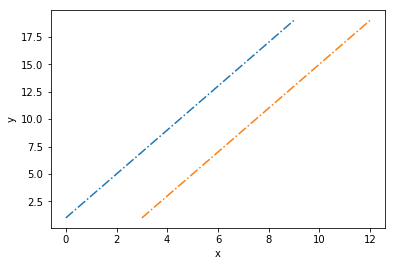

In [58]:
x = np.arange(10)
y = 2. * x + 1.    
plt.plot(x, y, '-.', x+3, y, '-.')
plt.xlabel('x')
plt.ylabel('y')

Note that if you do simply `plot(y)`, you will also get an answer: the x axis will then be assumed to be a sequence of same length as y, and starting at 0.   

You have basically four different ways to call `plot()` without looking too much into the details to its arguments:
``` python
plt.plot(y)   # assumes x = np.arange(len(y))
plt.plot(x, y) # Assumes solid line styles
plt.plot(x, y, 'd') # The third argument is the linestyle
plt.plot(x1, y1, 'd', x2, y2, '3', x3, y3, '--')  # plot n different sets of of curves with n different linestyles (here n=3)
```
you may sometimes also need to add `plt.show()` to visualize your plot. This is now often implicit when Ipython is loaded with option --matplotlib or --pylab, but if you do not see your plotting window popping up, this may mean that you need to use `plt.show()`

Finally, as a figure without axis name does not make much sense, you can add labels to abcissa and ordinate axis using:
``` python
plt.xlabel('My x quantity')
plt.ylabel('My y quantity')
```

In [ ]:
# Try out the above plotting commands 

Who said plotting with python is complicated ? Basic plotting is rather simple, and you can customize your plot a bit more using various plotting optional parameters as arguments of the function plot:

#### Set the color using *color* (or *c*)

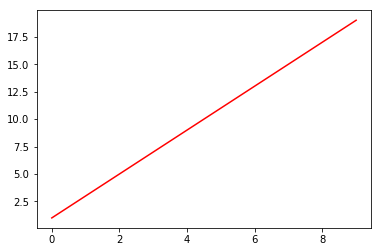

In [59]:
plt.plot(x, y, color='red')   # main colors are 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w' for blue, green, red, ...

#### Set the line width using *linewidth* (or *lw*)

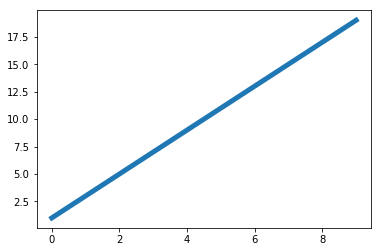

In [61]:
plt.plot(x, y, lw=5)  

#### Set the line transparency using parameter *alpha*

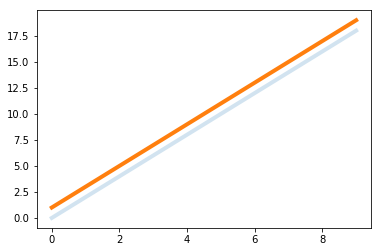

In [62]:
plt.plot(x, y-1., '-', lw=4, alpha=0.2)
plt.plot(x, y, '-', lw=4, alpha=1.) 

#### Add a *legend* for each line by associating a label to it and then do `plt.legend()`

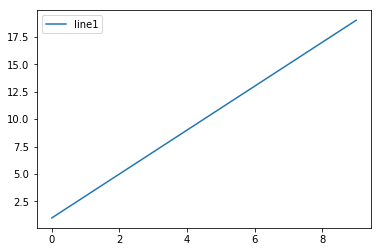

In [64]:
plt.plot(x, y)# label="line 1")
plt.legend(['line1'], loc='best')  # loc is for location: see help of plt.legend()

#### Use special characters (latex style) by adding `r` or `R` before your string and call math character with '$$'

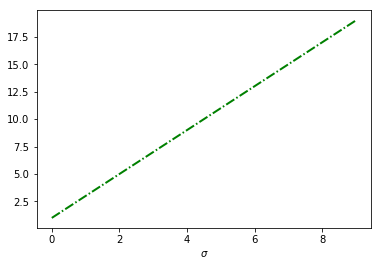

In [65]:
plt.plot(x, y, color='g', lw=2, ls="-.")
plt.xlabel(r"$\sigma$")

#### Set limits of your plot: `plt.xlim()`, `plt.ylim()`

(0.0, 20.0)

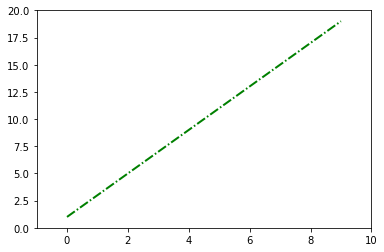

In [66]:
plt.plot(x, y, color='g', lw=2, ls="-.")
plt.xlim(-1, 10)
plt.ylim(y.min() - 1., y.max() + 1.)

#### set ticks location and label: `plt.xticks(), plt.yticks()`

([<matplotlib.axis.YTick at 0x7fda720e38d0>,
 <a list of 4 Text yticklabel objects>)

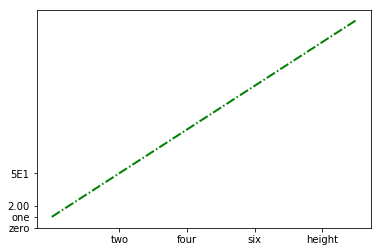

In [67]:
plt.plot(x, y, color='g', lw=2, ls="-.")
plt.xticks([2,4,6,8], ['two', 'four', 'six', 'height'])
plt.yticks([0,1,2,5], ['zero', 'one', '2.00', '5E1'])

#### Add some text at a specific position: `plt.text()`

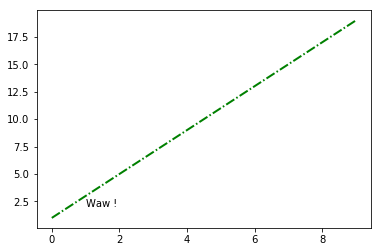

In [68]:
plt.plot(x, y, color='g', lw=2, ls="-.")
plt.text(1,2, 'Waw !')

#### Add a title to your plot: `plt.title()`

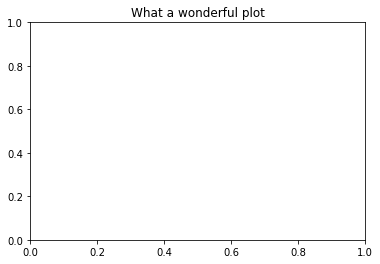

In [69]:
plt.title('What a wonderful plot')

#### Use log scale: `plt.xscale()`, `plt.yscale()`

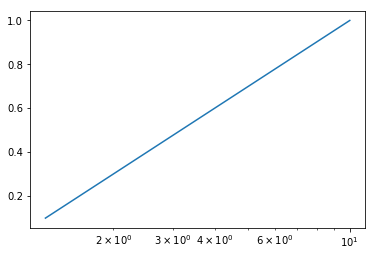

In [70]:
x = np.logspace(0.1, 1, 10)
y = np.log10(x)
plt.plot(x,y)
plt.xscale('log')

#### Create, clear and/or close a figure: `plt.figure()`, `plt.clf()`, `plt.close()`

- `f = plt.figure()` creates a new figure object `f` with options you can specify (e.g. figsize=(w, h), num). 
- `plt.clf()` (i.e. clear figure) *empty* your figure, and make it ready for a new plot.   
- `plt.close()` removes any internal reference to your figure (if you create a figure `fig = plt.figure()`, `fig = plt.figure()`, python will give different numbers to each figure and so keep both in memory). Hence, if you plot many figures, close your figure once not used to free memory. If you do it within Jupyter, your figure will not appear at the screen (but you may be able to [save it](#III.2.4) into an exernal file before closing it). Use `plt.close('all')` to close ALL your figures, or give the figure name (e.g. `f` in the example above, or id, to close a specific figure. 

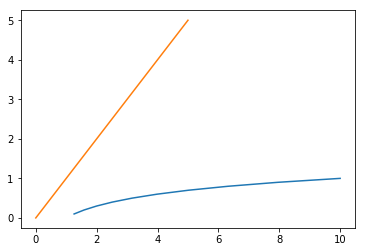

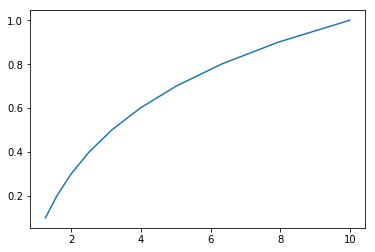

In [72]:
# What will be the output of the following command lines ? 
# (guess before printing enter)
fig = plt.figure()
plt.plot(x,y)
plt.plot(np.arange(6))

fig = plt.figure()
plt.plot(np.arange(6))
plt.clf()
plt.plot(x,y)
#plt.close(fig)
# Comment the last line and re-run the cell

### Summary

- To make a plot, we need first to import the `matplotlib.pyplot` (`as plt`). If you are in jupyter, use the `magic` command `%matplotlib inline` to be able to see your plot in your browser. 
- For simple plots (i.e. to quickly visualize the results of an operation) you may use `plt.plot()`, filling the functions with the parameters you want to change (linesize, linewidth, color, alpha, label). 
- There is a series of methods to modify some of the main properties of your plot: add a label (`plt.xlabel`/`plt.ylabel`), add a title (`plt.title`), change the plotting limits (`plt.xlim`, `plt.ylim`), modify the ticks (`plt.xticks`, `plt.yticks`), add text (`plt.text`), add a legend (`plt.legend()`). 
- Use `plt.clf()` to clear the content of a figure, and `plt.close()` to close a figure. 

### III.2 A bit more advanced plotting <a class="anchor" id="III.2"></a>

You can also do many different kind of "simple plots" like:
- Scatter plot `plt.scatter(x, y, s, c)` (s=pt size, c=color, sequence of colors or sequence of numbers)
- Plot with errorbars: `plt.errorbars(x, y, xerr, yerr)`
- Plot values in a 2D-array: `plt.imshow(X, aspect='equal', interpolation='nearest')`   (X is a 2D array)
- Calculate an histogram and plot it on-the-fly: `plt.hist(x, bins=20, range=[min, max])`  (bins is number of bins)
- Plot a step function: `plt.step(x, y)`  (x is assumed to be uniformly increasing)

But if you want to have more control on your figure, more flexibility in doing plots, you may need to consider your "plot" in an object oriented manner.

In fact, when you do `plt.plot()`, you do three things:
1. You create an *object* window (called **figure**), that is empty (no axis): `f = plt.figure()`
2. You then create an **axes** object within that figure. This object **axes** is in fact a *subplot* that delimits the area where you will draw your plot: `ax = f.add_subplot(1,1,1)` (you add a subplot with 1 row, 1 column, and its id is 1). 
3. You draw your plot in the subplot we have just defined: `ax.plot(x, y)`

Try this out in the cell below

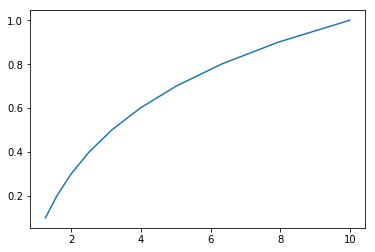

In [74]:
#plt.plot(x,y)
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.plot(x,y)

#### III.2.1 Plot properties    <a class="anchor" id="III.2.1"></a>

This method is more convenient for advanced plot and you will often find this "object oriented approach" to make plots in the source code of the figures you find in the [matplotlib gallery](#http://matplotlib.sourceforge.net/gallery.html) and they may serve as source of inspiration for your own fancy figure. This approach is also the one followed to generate the figures of our reference [book](#book). 

Now that we know that the area where we draw is *one or several axes*, we may have a look to the functions (that we should call *methods*) that modify the aspect of the plot. Most of the commands we have seen before to define plot extension, ticks, labels, ... change slightly of naming, starting now with the prefix `set_`method. For example:
``` python
plt.xlabel()  -> ax.set_xlabel()   # Adds xlabel
plt.xlim()    -> ax.set_xlim()     # defines the limits of x-axis
plt.title()   -> ax.set_title()    # Set title of object ax / of your subplot
plt.xticks()  -> ax.set_xticks()   # Set the xticks

```
And many more ! You may try `help(ax)` (after defining such an object) to see all its properties. Similarly to the `set_` methods, there is `get_` methods that allow you to know the existing (default) properties of `ax` and modify them. 
For example, you may want to know the values of the `xticks` of your subplot and modify them in the following way:
``` python
ax.get_xticks()  
    Out: [1,2,3,4]
# you can choose to show only two
ax.set_xticks([1,3])
# And change the way they are labeled:
ax.set_xticklabels(['un', 'three'])
```

Finally, you can modify the appearance of the labels (size, color, ...) using:
(this is not a well known command but very useful !! Keep it in mind)
``` python
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
```

** Exercise: **

- Create a figure using `ax`, plot `y=sin(x)` between -2$\pi$ and $\pi$.  
- Add labels and title, modify the `xticks` such that they show up in units of $\pi$ (i.e. pi symbol). 

#### III.2.2 Create multiple subplots   <a class="anchor" id="III.2.2"></a>

There is basically three options: 

- The first one follows the same approach than what we did before:  
``` python
# Note the use of figsize argument that takes a tuple of integers corresponding to width and height in inches
f = plt.figure(figsize=(8,6))     
ax1 = f.add_subplot(2,1,1)
ax2 = f.add_subplot(2, 1, 2)
```
It is then possible to adjust the spacing between the subplots using [subplots_adjust](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots_adjust), or use the [gridspec](http://matplotlib.org/users/gridspec.html) functionality for more advanced subplotting. `f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)` allows you to modify the space between different subplots and w.r.t. the margins of the figure. The values are all in relative units w.r.t. the size of the figure (i.e. 1 is the full width/heigth of the figure). While left/right/top/bottom fix the position w.r.t. the borders, `wspace` and `hspace` fixes the interspace (width / height) between the different subplots. 

- There is a simple and (I think) very convenient alternative if you simply want to quickly make several subplots in the same figure:
``` python 
f, ax = plt.subplots(nrows=n)
```
If $n > 1$, then ax is a list of axes objects. You can then easily put your plotting command in a loop to plot different results in different subplots. If you want to force the x/y axis to have the same extent, use argument `sharex=True`. You can also modify the relative space between subplots using `f.subplotadjust()`. 

- A third possibility, is to uses the method `add_axes` instead of `add_subplot` to add your axes object in the figure (this is somehow a more logical cammand !). The main option of `add_axes` however differs from add_subplot:  
``` python
f.add_axes([x_bleft, y_bleft, dx, dy]) 
```
The argument `x_bleft`, `y_bleft` define the position of the lower-left corner of the *subplot*, and and `dx` and `dy` are the width and height of the subplot, with all values specified in relative units (where 0 is left/bottom and 1 is top/right). This is therefore very easy to add an inset plot at an arbitrary position on your figure !

**Exercise**

- Create a figure made of 2 subplots located on two different rows. Plot a sine colored in red on the top row, and a cosine in blue on the bottom one. Add a vertical (horizontal) line in the *two* subplots at x = 0 (y=0).
- Create two *square* sublots in a figure that has figsize=(10, 6), leaving enough space for the axis and tick labels. (The second figure can be inside the first one or separated). Then, plot a line in each of these subplots. 

**Note**: 

Lines connecting the axis tick marks and noting the boundaries of the data area are called `spines`. You can access them though `ax.spines['left/right/top/bottom']`. You can move them or change their appearance using methods `ax.spine['left'].set_color('none')` (erase left spine), `ax.spine['right'].set_position(('data', 0))` (move the right spine to 0), ... See http://matplotlib.org/api/spines_api.html for more information.  

#### III.2.3 Twin axes  <a class="anchor" id="III.2.3"></a>

In some cases, it can be desirable to show two different x axes (e.g. distance and redshift), or two different y axes (e.g. two different quantities such as density and temperature). Matplotlib provides an easy way to create twin axes. For example:
``` python
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
```

creates a new set of axes (`ax2`) that *shares the x-axis with ax1*, but can have a *separate y-axis* (similarly, `twiny` would return a second set of axes sharing the y-axis, but with a separate x-axis). As an example, we can use this command to plot two different quantities as a function of time:

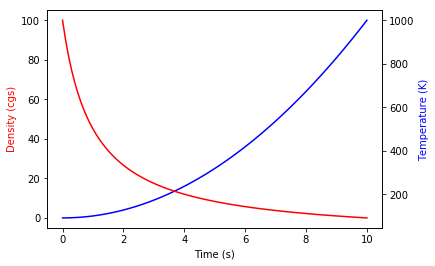

In [75]:
# Plot using twin axes
fig, ax1 = plt.subplots(nrows=1)
ax2 = ax1.twinx()
t = np.linspace(0., 10., 100)
ax1.plot(t, t ** 2, 'b-')
ax2.plot(t, 1000. / (t + 1), 'r-')
ax1.set_ylabel('Density (cgs)', color='red')
ax2.set_ylabel('Temperature (K)', color='blue')
ax1.set_xlabel('Time (s)')

#### III.2.4. Export your figure:   <a class="anchor" id="III.2.4 "></a>

Once you are happy with the figure you have created, you can save your figure in many different format. This figure saving can also be done within a script. 
You simply do:
``` python
f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(2,1,1)
ax1.plot(x,y)
f.savefig('mynicefigure.png', dpi=200, format='png')  # format is in general optional as the extension of your file defines it
```

Alternatively, `plt.savefig('myfigure')` will also save the current active figure. In ipython, and interactive window plotting (in general qt backend) you can also click in the window on the small "disk" icon. The interactive window also allows you to modify the size and subplot properties interactively (you can even change the line properties, ...). Although this may look convenient, this is not recommended to create the final version only that way. Use it maybe to experiment with various presentation and save the parameter results when you are happy such that latter on, you can re-launch your script with exactly the same set of parameters and get exactly the same output. If you want to make a minor change to your figure, just edit the lines concerned by those changes !

*What to think about before saving your (final) figure ? *

- Format of the output file: use of 'png' is generally not recommended for paper-quality print, but is good if you want to share your figure e.g. on the web, or make a figure for a presentation. "Word"/Office documents also better deal with this format. For scientific publications, "pdf" or "ps" (postscript) are best. 
- If you have several curves on your figure, verify that your plot is still readable in black and white. If not, think of using the variety of line styles and/or modify the linewidth and/or modify transparency (alpha) when possible to distinguish the various curves. Note that transparency is not always kept properly after savefig (especially when saving in postscript format). Think also to color blinded people and avoid using "green" and "red" on the same figure ! You can use color blindness simulator http://www.color-blindness.com/coblis-color-blindness-simulator/ to check the legibility of your figure !
- Are the labels, legend, ticks, large enough. You can modify the size of the labels using "fontsize" argument in `set_xlabel` (either "small/medium/large" or a float: 16/18 may be good for many application). Modifying the size of the ticks may be a bit more painful (but see below the [rcparameters](#rcparameters)), but remember also this simple way to change the size (but also color, ...) of the tick-labels: 
``` python
ax.tick_params(axis='both', which='major', labelsize=10)
```
- Beware that a fontsize that looks good on a figure of (10,8), may not on a figure of (18, 14). Especially since those figures may be shrinked in your publication (to occupy 1/2 columns). For that reason do not forget the argument "figsize()" when defining your figure. 
- You may feel, after exporting your figure, that there is still a lot of white space on top/left/bottom/up compared to the effective figure size. You can surely change this using the `subplot_adjust()` but there is a cheapper and generally effective way to do it with a single command line:
``` python
f.tight_layout()
``` 
This command will make the adjustment for you. 


**Exercises:** <a class="anchor" id="meshgrid"></a>

This exercise makes use of meshgrid and matplotlib.

- Evaluate a 2-D Gaussian (or 2D Moffat) centered on a grid of 20x20 pixels centered on 0. 
- Use the plotting command `CS = contour(X,Y,Z)` to visualise your results (! contour is a method of object axes). Use `clabel(CS)` to put labels on the contours. Try using with `contourf()`: what is the difference ? 
- Do the same but center the gaussian at x=2 and y = 0 and visualise your results. 
- Use `plt.imshow()` (instead of `plt.contours()` to visualise your results. 

#### Note:  Set (default) plot properties with `rc` parameters  <a class="anchor" id="rcparameters"></a>


In practice, this can be a lot of work for simple and common things (e.g. setting the tick label properties) to set the plot properties as in III.2.1, so matplotlib allows users to specify default properties via rc parameters. These can be set either in a ~/.matplotlib/matplotlibrc file, or in a script. To set these via a file, see [matplotlibrc](#http://matplotlib.sourceforge.net/users/customizing.html#a-sample-matplotlibrc-file) (this also shows all the options that are availables). Example (modified) lines from this script include: Example (modified) lines from this script include:
``` python
#xtick.major.size     : 4      # major tick size in points
#xtick.minor.size     : 2      # minor tick size in points
#xtick.major.pad      : 4      # distance to major tick label in points
#xtick.minor.pad      : 4      # distance to the minor tick label in points
#xtick.color          : r      # color of the tick labels
#xtick.labelsize      : medium # fontsize of the tick labels
#xtick.direction      : out     # direction: in or out
```
These lines are commented out by default, but you can uncomment them to make them active. However, it’s often easier to define properties on a per-script basis using the rc function. This function’s first argument is the category of the settings, and this is followed by a set of keyword arguments to set the parameters for this element. 
You can also set these parameters directly using:
``` python
plt.rc('xtick', color='r', labelsize='medium', direction='out')
plt.rc('xtick.major', size=4, pad=4)
plt.rc('xtick.minor', size=2, pad=4)
```

Finally, to best deal with latex characters / formating in figures, it is recommended to modify/set some rc parameters in the following way:
``` python 
pylab.rc('text', usetex=True)
pylab.rcParams['text.latex.preamble']=[r"\usepackage{color}"]
pylab.rcParams['text.latex.preamble']=[r"\usepackage{wasysym}"]
pylab.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"] 
``` 

** Note about exporting to eps **

Some journals require eps (encapsulated postscript) formating for figure which is not always well supported by matplotlib, in particular transparency is often lost. To export to `eps` it is then recommended to save the figure in pdf and use (in command line in a shell or run it using os.system()) `pdftops -eps` to convert to eps. 

### Summary: 

- We have explored the use of the "axes" object to more easily manage plot properties. Those "axes" can be created using `ax = fig.add_subplot()` or `f, ax = plt.subplots()`. This methodology also allows you to easily create a figure with multiple subpannels. 
- Main properties of axes objects are set using ax.set_XX, such as `ax.set_xlabel()`, `ax.set_xticks`, ... To get existing properties, we can use ax.get_XX. 
- Twin axes are easily created with "axes" objects using `ax2 = ax1.twinx()` / `ax2 = ax1.twiny()`
- We also know how to save a figure in various formats using `f.savefig()`, and listed some key aspects to think of before saving a final version of a figure for publication (label and tick sizes, file format, layout, legibility in black and white).  

## IV. `scipy`  <a class="anchor" id="IV"></a>

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

`scipy` can be compared to other standard scientific-computing libraries, such as the GSL (GNU Scientific Library for C and C++), or Matlab’s toolboxes. scipy is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

Before implementing a routine, it is worth checking if the desired data processing is not already implemented in Scipy. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, Scipy‘s routines are optimized and tested, and should therefore be used when possible.

We will NOT cover in details all the scipy capabilities/routines as this would be quite boring. We will briefly give an overview of some of them such that you know this exists ! We will also make use of several scipy functions in the future classes. 

#### IV.1 Overview  <a class="anchor" id="IV.1"></a>

- *Special functions*: `scipy.special` 
Special functions are transcendental functions. Help is quite clearly written. Frequently used ones are:
    * Bessel function, such as `scipy.special.jn()` (nth integer order Bessel function)
    * Elliptic function (`scipy.special.ellipj()` for the Jacobian elliptic function, ...)
    * Gamma function: `scipy.special.gamma()`, also note `scipy.special.gammaln()` which will give the log of Gamma to a higher numerical precision.
    * Erf, the area under a Gaussian curve: `scipy.special.erf()`
   
- *Linear algebra operations*: `scipy.linalg`
The scipy.linalg module provides standard linear algebra operations. This allows you to calculate the inverse (`scipy.linalg.inv()`), determinant (`scipy.linalg.det()`), of a square matrix. Note also that `numpy` also implements some operations on matrices (and beware: product of 2 numpy arrays is not a matrix product): 
    * `a.dot(b)` is the matrix product of a and b. If a, and b are 1-D vector than this is the scalar product (also called inner product) of the 2 vectors. 
    * `np.eye(2)` creates a diagonal matrix of 2x2 with 1 along the diagonal; 
    * `np.diag(a)` extracts the diagonal elements of matrix a. 
    * `np.cross(a,b)`: cross product of 2 vectors
    * see http://www.python-course.eu/matrix_arithmetic.php for a didactic overview of matrix arithmetic with numpy. 
    
- *Statistics and random numbers*: `scipy.stats`   
The module `scipy.stats` contains statistical tools and probabilistic descriptions of random processes. We will use some of these tools in the next classes ! Note that random number generators for various random process can be found in `numpy.random`. *Beware* that there is also a package `random` that is a random variable generator, and it is **DIFFERENT** from `np.random` (some functions have the same name but do different things). For example, if you want to select k unique random elements from a population sequence, then use `random.sample()`, while `np.random.sample()` will return random floats in the half-open interval [0.0, 1.0[ ! . 
     
- *Interpolation*: `scipy.interpolate`   
The `scipy.interpolate` is useful for fitting a function from experimental data and thus evaluating points where no measure exists. The module is based on the [FITPACK Fortran subroutines](http://www.netlib.org/dierckx/index.html) from the [netlib](http://www.netlib.org/) project. You may consult [this page](https://scipy.github.io/old-wiki/pages/Cookbook/Interpolation.html) and [this page](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Gridding_irregularly_spaced_data) for some nice examples of use of this function. 
    
- *Pre-defined constants*: `scipy.constants`
Contains most of the "generic" physical constants (c, h, G, ...). In addition there is also 2014 CODATA recommended values [CODATA2014](https://docs.scipy.org/doc/scipy/reference/constants.html#codata2014). To access those (as well as their units and uncertainties)  `import scipy.constants.physical_constants`. See help and/or consult the [scipy.constants doc](https://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants) to consult the list. To access e.g. the speed of light:
``` python
import scipy.constants 
scipy.constants.c
    Out: 299792458.0
scipy.constants.physical_constants["Planck mass"]
    Out: (2.17647e-08, 'kg', 5.1e-13)
```
    
- *Routines for numerical integration*: `scipy.integrate()`
The most generic integration routine (quadrature) is `scipy.integrate.quad()`. Other integration schemes exist such as fixed-order Gaussian quadrature (`fixed_quad()`), or Romberg integration method (`romberg`). `scipy.integrate` also features routines for integrating Ordinary Differential Equations (ODE). In particular, `scipy.integrate.odeint()` is a general-purpose integrator using LSODA (Livermore Solver for Ordinary Differential equations with Automatic method switching for stiff and non-stiff problems), see the [ODEPACK Fortran library](http://people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html) for more details. You can find a few examples in the [scipy lecture notes](http://www.scipy-lectures.org/intro/scipy.html#numerical-integration-scipy-integrate). 
   
-  *File input/output*: `scipy.io` and `scipy.misc`
This allows you to read some specific file formats generated by other programs such as MATLAB(R) (`scipy.io.loadmat`, `scipy.io.savemat`), idl (`scipy.io.idl`), or unformatted sequential files from Fortran code.   
There is also a function to read images (`png`, with `scipy.misc`
``` python 
from scipy import misc
misc.imread('fname.png')    
    Out: array(...)
# Matplotlib also has a similar function
import matplotlib.pyplot as plt
plt.imread('fname.png')    
    Out: array(...)
```

Note: MATLAB(R) is a registered trademark of The MathWorks, Inc., 3 Apple Hill
Drive, Natick, MA 01760-2098, USA.


- *Fast Fourier Transforms*: `scipy.fftpack()`

The `scipy.fftpack` module allows one to compute fast Fourier transforms. 

#### IV.2 Function minimization and fitting: `scipy.optimize`    <a class="anchor" id="IV.2"></a>

Optimization of a function is an important aspect of many data analysis problems. The `scipy.optimize` module provides useful algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding. 

We will focus here on one of the most used application of minimization techniques which is $\chi^2$ minimization, namely curve fitting. As you know, curve fitting consists in minimizing the *weighted sum of the squared residuals* (i.e. residuals being the difference between the model and the data):    
$\chi^2 = \sum_{i=1}^{N} \left( \frac{y_i - f(x_i)}{\sigma_i} \right)^2$

While it is possible to define ourself a function that calculates the $\chi^2$ of a given model and use some the functions implemented in `scipy.optimize` to solve this minimization problem, we can also directly use the convenience function `curve_fit()`, that already does it for us. This function implements the "Levenberg-Marquardt" algorithm to find the parameters that minimize your $\chi^2$ merit function. Conceptually, that method switch between the "Gradient Descent Method" (you perturb the parameters by some amount "h" in the direction of steepest descent in your $\chi^2$ function), and the "Gauss-Newton Method" that assumes that locally your function is quadratic in the parameters to determine "h", through a "lagrange parameter" lambda that is modified depending of the observed change in merit function. The `curve_fit()` function works like this:
``` python
# first create a function that defines your model
# It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
def func(x, p1, p2, p3):
y = f(x, p1, p2, p3)  # replace f(x, p1, p2, p3) by a function of vector x with parameters p1, p2, p3
    return y
# Second we call curve_fit(), first three arguments being func, xdata, ydata. Next two are optional initial guess and errors on y. 
pfit, pcov = scipy.optimize.curve_fit(func, xdata, ydata, p0=x0, sigma=sigma) 
# there is the possibility to constrain the parameters to certain ranges using method = 'trf'
```
We can move to the next cell to see in details an example of curve fitting. 
Beware, the covariance matrix, that allows you to make a proper (i.e. statistically valid) uncertainty estimate on the fitted parameters, does only make sense in case of gaussian noise. 

**Note**: If you are not too familiar with curve fitting/least square minimization, how to do when you have errors also on the independant variable (namely x), about difference between linear and non linear least-square (i.e. applied to linear and non linear models), about the basic concept behind the least square fitting algorithm ... I advise you to consult [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) (Chapters 10, 15), and [Hogg, Bovy, Lang 2010](https://arxiv.org/abs/1008.4686). We can also have a dedicated lecture on this topic (*Let me know*). 

In [8]:
# Based on what we have studied before, you should understand EVERY line of the following cells.
# Import the scipy.optimize module that contains the function curve_fit()
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

# Let's define a polynomial of order 2 as our model
def polynomial(x, p1, p2, p3):
    return p1 + p2*x + p3 * x**2

# Create fake data: a line y = a + bx with a=0, b=0.3
xdata = np.arange(0., 6., 0.05)
ydata = 0.3 * xdata + 0.1 * np.random.randn(len(xdata))
sigma = np.zeros(len(xdata)) + 0.1
x0 = [0, 0, 0] # Define the initial parameters
pfit, pcov = scipy.optimize.curve_fit(polynomial, xdata, ydata, x0, sigma)
model = polynomial(xdata, pfit[0], pfit[1], pfit[2])
# let's look to the most likely values of the parameters
print ['p[ %i ] = %.2f' %(i, pfit[i]) for i in np.arange(3)]
# Let's also print the errors on the parameters based on the covariance matrix
print ['sigma[ %i ] = %.2f' %(i, np.sqrt(pcov[i, i])) for i in np.arange(3)]
# We need to evaluate the chi^2 ourself
chi2 = sum( ( (ydata - model ) / sigma )**2 )
print 'chi^2 = %.3f and reduced chi^2 = %.3f' %(chi2, chi2 / ( len(xdata) - 3.))

['p[ 0 ] = 0.05', 'p[ 1 ] = 0.26', 'p[ 2 ] = 0.00']
['sigma[ 0 ] = 0.03', 'sigma[ 1 ] = 0.02', 'sigma[ 2 ] = 0.00']
chi^2 = 137.579 and reduced chi^2 = 1.176


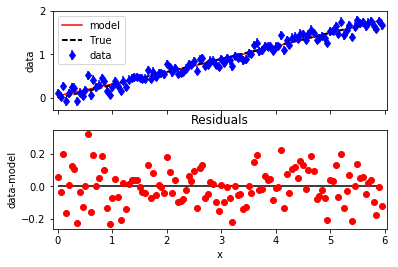

In [9]:
# Now we can visualize the results
residuals = ydata-model  # Calculate the residuals
# We create a window with 2 subplots
f, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
# In the top one, we plot the data, the model, the "true" value
ax[0].errorbar(xdata, ydata, yerr=sigma, ls='', marker='d', color='blue', label='data')
ax[0].plot(xdata, model, color='red', label='model')
ax[0].plot(xdata, 0.3 * xdata, lw=2,  ls='--', color='black', label='True')
# We plot residuals in the bottom one, as well as an horizontal line
ax[1].plot(xdata, residuals, 'o', color='red')
ax[1].hlines(0, np.min(xdata), np.max(xdata))
# We customize a bit more the plot
ax[1].set_title('Residuals')
ax[0].set_xlim(np.min(xdata)-0.1, np.max(xdata)+0.1)
ax[0].legend(loc='best')
ax[1].set_xlabel('x')
ax[1].set_ylabel('data-model')
ax[0].set_ylabel('data')

1.58286759625e-10 0.107074489983


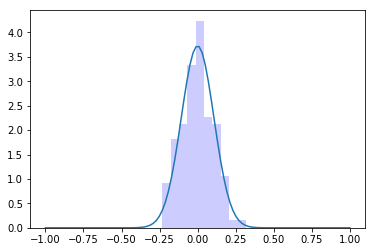

In [10]:
import scipy.stats
# Are the residuals Normally distributed ?
x = np.linspace(-1,1,100)
hist_resi = plt.hist(residuals, bins=10, color='blue', alpha=0.2, normed=True)
# Note in the above line that we have used the option "normed = True" . 
# Consequently, the integral of the histogram will sum to 1. This is effectively a pdf.
fitpdf_mean, fitpdf_sigma = scipy.stats.norm.fit(residuals)
print fitpdf_mean, fitpdf_sigma
plt.plot(x, scipy.stats.norm.pdf(x, fitpdf_mean, fitpdf_sigma))

**Exercise:**
    
We know that if we repeat the observations a large number of times, the $\chi^2$ should get distributed following a $\chi^2$ distribution. If $Q = \sum_{i=1}^{N} z_i^2$ is the sum of the squared residuals, the $\chi^2$ distribution, with $k = N$ degrees of freedom can be written:      
$$
p(Q/k) = \frac{1} {(2\,\Gamma(k/2))}  (Q/2)^{k/2-1}  \exp(-Q/2)
$$

- Write a short program that allows you to verify that if you repeat (the above) observations a sufficiently large number of times and carry out a least-square fit, your $\chi^2$ effectively follows a $\chi^2$ distribution. Note that the pdf associated to a $\chi^2$ distribution is available in `scipy.stats.chi2.pdf()` (see the help for more info; the reference to "df" in the help corresponds to the number k of degrees of freedom). Tip: No need to fit anything ... you KNOW the # of dof !

- If needed, adapt your program to change the number of dof (keep the model unchanged), and check how the chi^2 distribution looks like for dof = 1, dof = 3, dof=6. 

- Modify your program such that the errors provided to `curve_fit` are wrong (over estimated). How does this impact the $\chi^2$ value and its distribution ?


## V. The standard library  <a class="anchor" id="V"></a>
   
This section gives an overview of the very useful modules methods you may need to use at some point to manage your files, directory structures, platform-related file naming conventions, ... 

### `os`: operating system functionality

> “A portable way of using operating system dependent functionality.”

#### Directory and file manipulation:

- Current directory:   `os.getcwd()`    

- List a directory:  `os.listdir(os.curdir)`

- Make a directory:   `os.mkdir('junkdir')`

- Rename the directory:  `os.rename('junkdir', 'foodir')`

- Delete a file:  `os.remove('junk.txt')`


In [ ]:
import os
# Experiment with the use of OS and check-out the output
print os.getcwd()
print os.listdir(os.curdir)
fp = open('junk.txt', 'w')    # first create an empty file
fp.close()
print 'junk.txt' in os.listdir(os.curdir)
os.remove('junk.txt')
print 'junk.txt' in os.listdir(os.curdir)

### os.path: path manipulations

`os.path` provides common operations on pathnames:

- Get the absolute path name for a file in a directory: `a = os.path.abspath('junk.txt')`  
``` python
>>> a
    '/Users/cburns/src/scipy2009/scipy_2009_tutorial/source/junk.txt'
```
- Split Path name and file name:  `os.path.split(a)`   

- Get the path part of `a`:  `os.path.dirname(a)`     

- Filename part of `a`:  `os.path.basename(a)`    
    'junk.txt'

- Split file name into name and extension: `os.path.splitext(os.path.basename(a))`   

- Check existence of a file in a path: `os.path.exists('junk.txt')`   

- Check that a filename corresponds to a file: `os.path.isfile('junk.txt')`   

- Check for a directory name: `os.path.isdir('junk.txt')`    

- Pathname corresponding to home of the user: `os.path.expanduser('~')`     

- Create a string by merging pathnames/strings: `os.path.join(os.path.expanduser('~'), 'local', 'bin')`    


### `subprocess`: running an external command

This is also very useful to call an externally compiled program.
- Call a simple command, wait for it to finish, and get the return code:

```  python
import subprocess
subprocess.call('chmod +x filename', shell=True)
```

- Communicate with the process (try for example with some_program.f):

``` python
>>> p1 = subprocess.Popen('./some_program',stdout=subprocess.PIPE)
>>> p1.stdout.readline()
>>> p1.send_signal(signal.SIGSTOP)
>>> p1.send_signal(signal.SIGCONT)
>>> p1.send_signal(signal.SIGKILL)
```

** Notes: **

How to communicate with a program during execution:

Suppose we want to run a program, and check its output while it’s running. For this, we need to read the program’s standard output while it is running, wait for the next line to appear, and end the loop when the output stream is closed. This can be done with:
``` python 
def line_at_a_time(fileobj):
    while True:
        line = fileobj.readline()
        if not line:
            return
        yield line
```

Now, we can run the program and check the output. Suppose “myprogram” prints ERROR to the screen when it encountered an error, and we want to kill the program whenever that occurs:
``` python 
>>> p1 = subprocess.Popen('./my_program',stdout=subprocess.PIPE)
>>> for line in line_at_a_time(p1.stdout):
        if "ERROR" in line:
            p1.send_signal(signal.SIGKILL)
```
Similarly, you can use subprocess.PIPE to send data to stdin.


### Environment variables:

Get environment variable: 

- All defined environment variable:  `os.environ.keys()`   
- Get the path to which corresponds a given env. variable:    
`os.environ['PYTHONPATH']`     
OR    
`os.getenv('PYTHONPATH')`


### `sys`: system-specific information

This is particularly useful if you want to make a quick fix to import some python codes located in a specific directory, or to figure out which python is used when you have multiple python installed on the machine ... (these kind of problems can now be more easily avoided if you install python via conda ...). 

System-specific information related to the Python interpreter.

- Which version of python are you running and where is it installed: 
        * Platform: `sys.platform`
        * Version of python: `sys.version`
        * Location of python used: 'sys.prefix`

- List of command line arguments passed to a Python script: `sys.argv`

- The  list of strings that specifies the search path for modules is initialized from PYTHONPATH, and obtained from:   `sys.path` 

## VI. References and supplementary material: <a class="anchor" id="VI"></a>

**Appendix A** of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy.  

Other useful references to know more about the topics covered in this class: 
    
- The python tutorial (Chap. 6): [https://docs.python.org/2/tutorial/modules.html](https://docs.python.org/2/tutorial/modules.html)
    
- Standard python library:[http://www.ster.kuleuven.be/~pieterd/python/html/pure_python/standard_library.html](http://www.ster.kuleuven.be/~pieterd/python/html/pure_python/standard_library.html)
    
- Scipy lecture notes: (from which part of numpy, scipy, matplotlib tutorial are inspired): [http://www.scipy-lectures.org/index.html](http://www.scipy-lectures.org/index.html)  (creative Commons 4.0)
  
- Excellent video introducing numpy (and that inspired part of the numpy section of this notebook) by J. Vandeplas: https://www.youtube.com/watch?v=EEUXKG97YRw

- Numpy quick-start: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

- About minimization of functions and finding local/global minima with scipy (topic not covered in this lecture): http://www.scipy-lectures.org/advanced/mathematical_optimization/index.html

Specific Matplotlib documentation (where to go when you do not know how to plot this/that):

- [Thumbnail gallery](http://matplotlib.sourceforge.net/gallery.html): hundreds of thumbnails linking to the source code used to make them (find a plot like the one you want to make): a VERY useful resource !
- Pyplot Tutorial: http://matplotlib.org/users/pyplot_tutorial.html
- [Matplotlib home page](http://matplotlib.sourceforge.net): key pylab plotting commands in a table. 
- Matplotlib manual: http://matplotlib.sourceforge.net/contents.html
- [Code examples](http://matplotlib.sourceforge.net/examples/): extensive examples showing how to use matplotlib commands.
